## *** Data Analysis Python Project Blinkit Data


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:/Users/hp/Downloads/BlinkIT Grocery Data.csv") # change the slash in the path to forward slash

In [6]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


### Explore Data

In [9]:
df.shape

(8523, 12)

In [10]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [14]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [7]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Total Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


 ### DATA CLEANING

In [15]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
df['Item Fat Content'] = df['Item Fat Content'].replace({ 'LF': 'Low Fat',
                                                         'low fat': 'Low Fat',
                                                         'reg': 'Regular'

    
})

In [18]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## Business Reaquirements 

In [21]:
Total_Sales = df['Total Sales'].sum()
Average_Sales = df['Total Sales'].mean()
nb_item_sold = df['Item Identifier'].count()
average_rating = df['Rating'].mean()
print(" Total Sales: ", Total_Sales, "Average Sales: ",Average_Sales, "Number of items sold: ",nb_item_sold," Average Rating: ",average_rating)


 Total Sales:  1201681.4808 Average Sales:  140.9927819781767 Number of items sold:  8523  Average Rating:  3.965857092573038


In [25]:
print(f"Total sales : ${Total_Sales:,.1f}") #the first f means a formatted string, the coma is a K seperator, .1f means it has to show one digit after the decimal point

Total sales : $1,201,681.5


In [27]:
print(f"Average Rating : {average_rating:,.0f}")

Average Rating : 4


In [28]:
sales_by_fat = df.groupby('Item Fat Content')['Total Sales'].sum()
print(sales_by_fat)

Item Fat Content
Low Fat    776319.6784
Regular    425361.8024
Name: Total Sales, dtype: float64


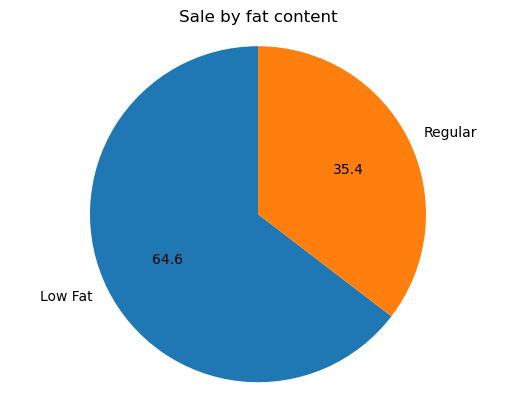

In [31]:
plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%.1f', startangle = 90)
plt.title('Sale by fat content')
plt.axis('equal') #this will make sure the pie is a circle
plt.show()

In [36]:
sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)
print(sales_by_type)

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Total Sales, dtype: float64


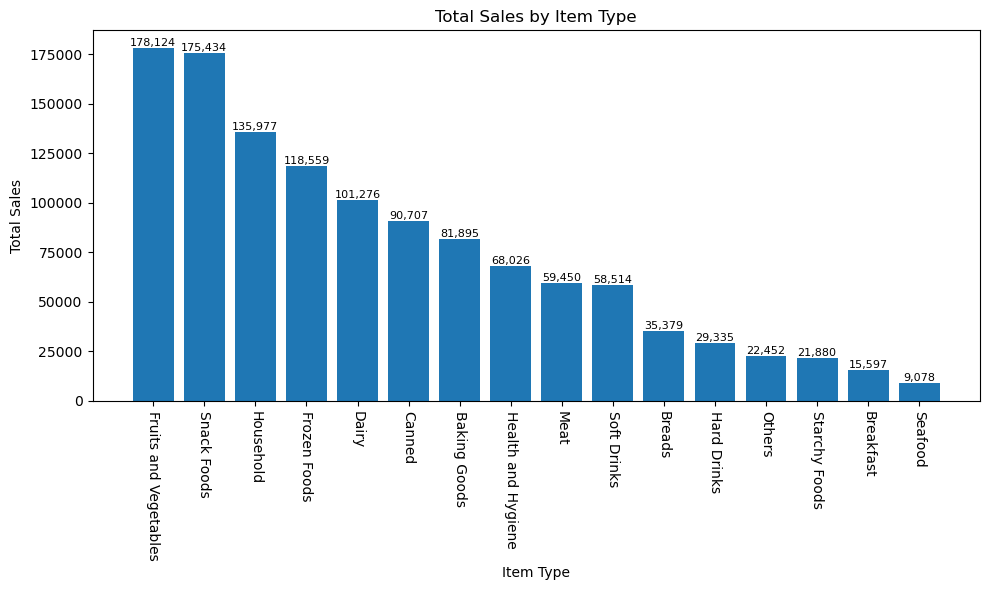

In [48]:
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation= -90) #so the label don't overlapp (45 or -90) make sure its not 0
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars: # this part is to put the numbers in the upper part of the bars
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() ,
             f"{bar.get_height():,.0f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [51]:
print(df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum() )

Outlet Location Type  Item Fat Content
Tier 1                Low Fat             215047.9126
                      Regular             121349.8994
Tier 2                Low Fat             254464.7734
                      Regular             138685.8682
Tier 3                Low Fat             306806.9924
                      Regular             165326.0348
Name: Total Sales, dtype: float64


In [50]:
print(df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum().unstack() )

Item Fat Content          Low Fat      Regular
Outlet Location Type                          
Tier 1                215047.9126  121349.8994
Tier 2                254464.7734  138685.8682
Tier 3                306806.9924  165326.0348


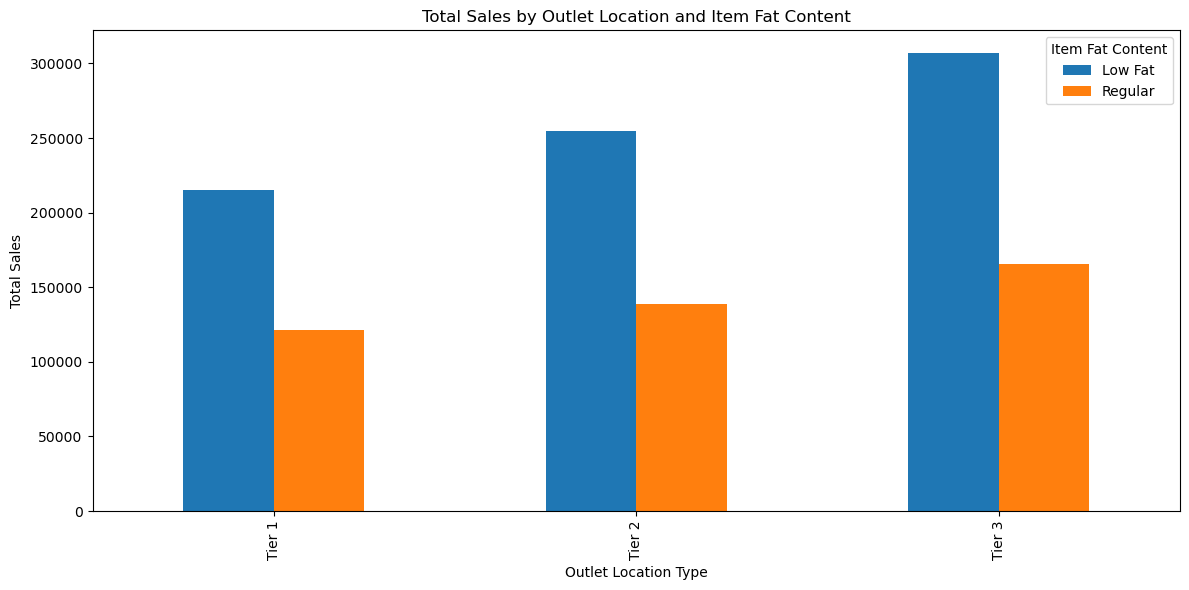

In [56]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum().unstack() 
#unstack used so  the bars don't overlap on each other

grouped.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Location and Item Fat Content')

plt.legend(title='Item Fat Content')
plt.tight_layout() #This automatically adjusts the plot's parameters to provide a tight layout, preventing labels from overlapping or being cut off.
plt.show()

In [57]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

In [58]:
print(sales_by_year)

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Total Sales, dtype: float64


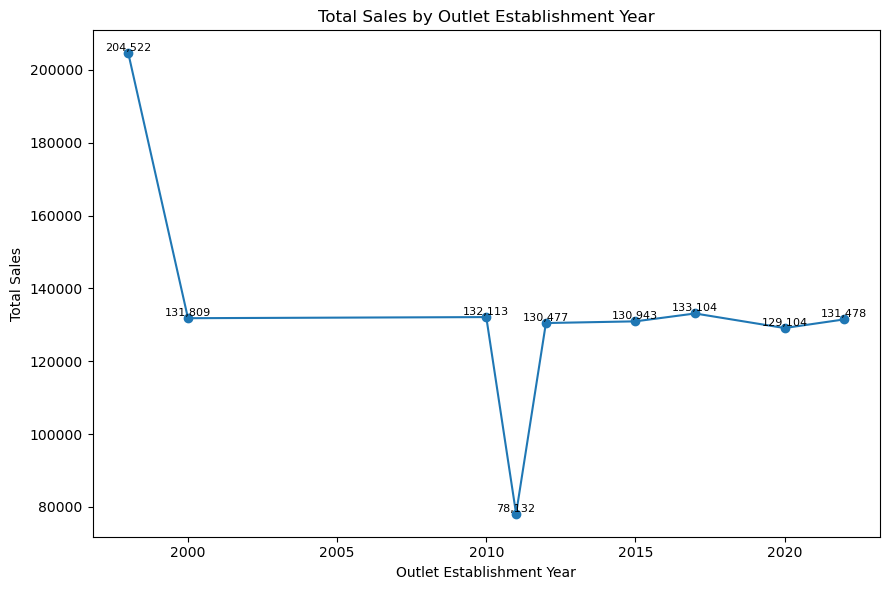

In [60]:
plt.figure(figsize=(9, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)


plt.tight_layout()
plt.show()

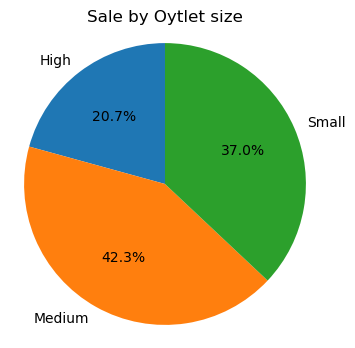

In [62]:
sales_by_size = df.groupby('Outlet Size')['Total Sales'].sum()
plt.figure(figsize= (4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Sale by Oytlet size')
plt.axis('equal') #this will make sure the pie is a circle
plt.show()

In [68]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
print(sales_by_location)

  Outlet Location Type  Total Sales
0               Tier 1  336397.8120
1               Tier 2  393150.6416
2               Tier 3  472133.0272


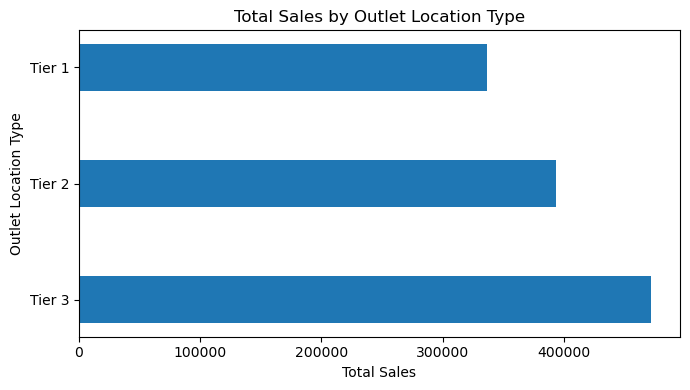

In [71]:

sales_by_location = sales_by_location.sort_values(by='Total Sales', ascending=False)

plt.figure(figsize=(7, 4))
plt.barh(sales_by_location['Outlet Location Type'], sales_by_location['Total Sales'], height=0.4)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()